# Pandas
___

O Pandas é uma das principais bibliotecas utilizadas nos trabalhos de ciência de dados no dia-a-dia. Ele trabalha com dados de forma tabular e é bastante comparado ao excel. Suas duas principais estruturas de dados são a ```series``` e o ```dataframe (df)```, o primeiro é criado através de um array de uma dimensão e o segundo com arrays de duas dimensões.

O Pandas tem seus prós e contras, dentre seus prós temos a quantidade enorme de funções para criar, ler, salvar. transformar e tratar dados tabulares, tem uma sintaxe fácil e permite o encadeamento de métodos (method chaining). Dentre seus contras temos a ineficiência de memória para se trabalhar com grandes datasets (big data), porém existem outras bibliotecas parecidas com sintaxe parecida que trabalham com grandes quantidades de dados (Vaex e Dask).

Entender Pandas é totalmente necessário visto que é bem mais normal trabalharmos com massas de dados não tão grandes e todas as bibliotecas que trabalham com bigdata em python possuem uma classe chamada dataframe. A familiaridade com pandas é necessária para cientistas de dados iniciantes até para os mais sêniores.

# Importação
___

Para importar o pandas basta utilizar o código:

```python
import pandas as pd 
```

O alias ``pd`` é comumente utilizado e por convenção se mantém consistente ao longo de códigos escritos em python nas mais diversas formas.

In [ ]:
## importando o pandas

import pandas as pd

## importando o numpy e definindo a seed aleatória

import numpy as np
np.random.seed(42)

## ignorando alguns warnings

import warnings
warnings.filterwarnings("ignore")

## barra de progresso
from tqdm import tqdm

# Dados
___

Para executar nosso trabalho iremos utilizar os datasets:

> ```crime_data_from_2020_to_present.csv```. A referência para o entendimento de cada colunas pode ser encontrado em [kaggle](https://www.kaggle.com/susant4learning/crime-in-los-angeles-data-from-2020-to-present). 

>```carros.csv``` que descreve as características de alguns carros juntamente com seus preços de venda (esse dataset foi adaptado de [kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)).

> ```titanic.csv``` que descreve cada um dos passageiros do Titanic e se sobreviveram ou não ao seu desastre. A referência com a descrição de cada coluna pode ser encontrada em [kaggle](https://www.kaggle.com/c/titanic/data).


> ```googleplaystore_user_reviews.csv``` contendo as avaliações e resultados da análise de sentimento de 1074 aplicativos diferentes da loja de aplicativos da google. [kaggle](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv).

> ```gasolina_<ano>.csv``` contendo a quantidade em litros de gasolina vendida para cada munícipio do Brasil entre os de 2000 e 20018. [portal dados abertos](https://dados.gov.br/dataset/a-vendas-anuais-de-etanol-hidratado-e-derivados-de-petroleo-por-municipio-gasolina-c).

# Series
___

Series são conjuntos de dados de uma dimensão criados a partir de arrays (também de uma dimensão), são a base do pandas e possuem 4 características básicas:

* dados (data)
* indíces (index)
* tipo do dado (dtype)
* nome (name)

As várias funções e métodos do pandas podem ser utilizados em séries, dataframes ou em ambos, basta consultar a a [documentação de referência](https://pandas.pydata.org/docs/reference/index.html#api) para entender.

Para criar uma série basta utilizar a função:

```python 
pd.Series(data,index,dtype,name)
```

In [ ]:
## criando um array

arr = np.random.randint(50,100,size=24)
arr

In [ ]:
## criando uma série

pesos =  pd.Series(data=arr, index=range(0,24), dtype=int, name='pesos')
pesos

É possível acessar cada uma das características de uma série através dos métodos com seus respectivos nomes.

In [ ]:
## acessando os dados da série

pesos.values

In [ ]:
## acessando os indices da série

pesos.index

In [ ]:
## acessando o tipo dos dados da série

pesos.dtype

In [ ]:
## acessando o nome da série

pesos.name

# Operações com Séries
___

As operações com séries funcionam da mesma forma das operações com arrays. Toda a comodidade dos arrays é replicada para séries.

In [ ]:
## criando um array dos alturas e sua respectiva série

arr_alturas = np.random.randint(50,70,size=24)
alturas = pd.Series(arr_alturas,name='height*10(foot)')
alturas

In [ ]:
## transformando a altura de foot para cm

alturas = (alturas/10)*30.48
alturas.name = 'altura(cm)'
alturas

Para executar operações entre duas séries é necessário que ambas possuam o mesmo shape. Nos casos de operações entre séries com shapes diferentes é criado um valor nulo no local.

In [ ]:
## criando a série com a correção das alturas

correcao_altura = pd.Series(np.random.normal(size=12),name='correcao_altura(cm)')
correcao_altura

In [ ]:
alturas + correcao_altura

Caso exista necessidade de adicionar valores a uma série, podemos utilizar o método:

```python
.append()
```

Vale notar que o método acima só aceita outra série e não arrays ou listas.

In [ ]:
## criando a série para append
serie_para_append = pd.Series(np.array([0 for _ in range(12)]))
serie_para_append

In [ ]:
## dando append na série correcao_altura ignorando os índices
correcao_altura = correcao_altura.append(serie_para_append,ignore_index=True)
correcao_altura

In [ ]:
## corrigindo alturas

alturas = alturas + correcao_altura
alturas

Também é possível executar operações lógicas com séries e o retorno são também series de valores booleanos.

In [ ]:
alturas > 190

In [ ]:
## utilizando condições lógicas mais complexas

alturas > 190 and alturas < 200

As condições lógicas mais complexas utilizando ```not and or``` no pandas são representadas por outros operadores, respectivamente ```~ & \```.

In [ ]:
## utilizando and &

(alturas > 190) & (alturas < 200)

In [ ]:
~( (alturas > 190) & (alturas < 200) )

In [ ]:
alturas[(alturas > 190) & (alturas < 200)]

In [ ]:
serie_index_str = pd.Series(np.array([10,12,15]),index=['valorA','valorB','valorC'])

In [ ]:
serie_index_str['valorC'] == serie_index_str[-1] == serie_index_str[2]

# DataFrame
___

O dataframe nada mais é do que um conjunto de series organizadas como colunas. Ele possui a maior gama de métodos e funções, possui características e pode ser indexado facilmente. Ele é a principal estrutura de dados utilizada no pandas e torna o trabalho de manipulação de dados muito mais simples. Para criar um dataframe basta utilizar um array de duas dimensões através do código:

```python
pd.DataFrame(data,index,columns,dtype)
```

Diferente da criação das séries, ao invés de nome o dataframe tem ```columns``` que é uma lista com os nomes de cada coluna.

In [ ]:
## criando um array de duas dimensões utilizando os já criados

arr_2d = np.column_stack([alturas,pesos])
arr_2d

In [ ]:
## criando um dataframe

df = pd.DataFrame(data=arr_2d, columns=['ALTURAS DOS JOGADORES','PESOS DOS JOGADORES'])
df

O dataframe possui uma série de características que podem ser acessadas e algumas até alteradas.

In [ ]:
## shape

df.shape

O shape do dataframe é igual ao do array que o criou, caso o dataframe seja alterado o shape também é alterado.

In [ ]:
## size

df.size

In [ ]:
## columns

df.columns

É possível alterar os nomes das colunas sobreescrevendo os valores associados a ```df.columns```

In [ ]:
## alterando o nome das colunas de forma rápida

df.columns = [x.lower().replace(' ','_') for x in df.columns]
df.columns

In [ ]:
df

In [ ]:
## indíces

df.index

In [ ]:
## eixos

df.axes

Vale a pena notar que em várias funções do pandas existe o parâmetro ```axis``` podendo receber os valores 0 ou 1.

![axis](imgs/axis.png)

O racional é que no eixo 0 efetuamos uma operação **por toda a exntesão das linhas** e no eixo 1 efetuamos a operação **por toda a exntesão das colunas**.

Para conseguir informações rápidas sobre o dataframe, podemos utilizara a função ```df.info()``` que mostra:

* a classe do objeto em ```df```
* informações sobre o índice
* quantidade de colunas
* tipos dos dados de cada coluna
* quantidade de valores não nulos em cada coluna
* uso de memória para guardar o dataframe

In [ ]:
df.info()

Dataframes também podem ser criados através de dicionários através da função:

```python
pd.DataFrame.from_dict(data,orient,dtype,columns)
```

O parâmetro ```orient``` vai controlar o funcionamento da função e resultará em resultados diferentes.

In [ ]:
data = {
    'col_1': [3, 2, 1, 0], 
    'col_2': ['a', 'b', 'c', 'd']
}

In [ ]:
## utilizando a orientação por colunas

pd.DataFrame.from_dict(data,orient='columns')

In [ ]:
## utilizando a orientação por indices

pd.DataFrame.from_dict(data,orient='index')

Perceba que ```orient``` controla a interpretação das chaves do dicionário e sua transformação em linhas (index) ou colunas (columns).

# Input e Output
___

O pandas oferece várias funções ler dados de vários formatos e escrever também em vários formatos. O formato mais comum de dados que utilizamos são os ```csv``` e o ```xlsx```, mas o pandas está preparado também para ler arquivos com os seguintes formatos:

* texto (extensão .txt)
* .json
* html
* XML
* área de transferência
* HDF5
* .parquet
* stata
* sas
* spss

Para a leitura de arquivos basta utilizarmos o sintaxe ```read_<tipo do arquivo>``` da seguinte forma:

```python
pd.read_csv()
pd.read_excel()
pd.read_json()
pd.read_xml()
pd.read_hdf()
pd.read_html()
```

Para a escrita de arquivos basta utilizarmos o sintaxe ```to_<tipo do arquivo>``` da seguinte forma:

```python
df.to_csv()
df.to_excel()
df.to_json()
df.to_xml()
df.to_hdf()
df.to_html()
```

In [ ]:
pd.read_html("https://en.wikipedia.org/wiki/Federative_units_of_Brazil")[1]['Population(2019)[2]'].plot(kind='bar')

In [ ]:
## abrindo arquivo csv

pd.read_csv('data/crime_data_from_2020_to_present.csv').head()

A função

```python
pd.read_csv()
```

possui vários parâmetros, em sua grande maioria são opcionais, mas são extremamente úteis para nosso trabalho. Alguns dos mais utilizados:

* encoding -> define o encoding dos dados de entrada
* sep -> define o separador entre os dados
* usecols -> recebe uma lista com o nome das colunas que devem ser carregadas
* nrows -> define a quantidade de linhas a serem carregadas
* decimal -> define o caracter utilizado para separação de decimais
* converters -> recebe um dicionário contendo o nome das colunas e os tipos para conversão

A utilização dos parâmetros de leitura de arquivos vai sempre variar de acordo com a necessidade de leitura. Em casos de dados muito grandes, podemos utilizar ```nrows``` para trabalhar inicialmente com uma pequena amostra dos dados e depois executar o código com o dataset completo, por exemplo.

In [ ]:
## carregando todo o dataset

pd.read_csv('data/crime_data_from_2020_to_present.csv')

In [ ]:
## usando o nrows

pd.read_csv('data/crime_data_from_2020_to_present.csv',nrows=100)

Também podemos usar o ```usecols``` para ler somente as colunas que queremos (e em conjunto com ```nrows```) e diminuir o consumo de memória.

In [ ]:
## utilizando nrows e usecols

small_df =  pd.read_csv('data/crime_data_from_2020_to_present.csv',
            nrows=1000,
            usecols=['AREA','Vict Sex','Vict Descent'])

small_df

In [ ]:
pd.read_csv('data/gasolina/gasolina_2000.csv',sep=';',encoding='latin1')

# Indexing e Slicing
___

Já vimos anteriormente que todo dataframe possui algumas características (ou partes) que são importante. Um array de valores (dados), um conjunto de índices para as linhas e também um conjunto de índices para as colunas. Para acessarmos e modificarmos valores nos dataframes é necessário entendermos os conceitos por trás desses índices.

In [ ]:
df = pd.read_csv('data/crime_data_from_2020_to_present.csv')
df.head()

Já vimos que é possível acessar os nomes dos índices e das colunas através dos códigos

```python
df.columns
df.index
```

In [ ]:
## nomes das colunas

df.columns

In [ ]:
## indices das linhas

df.index

Podemos modificar os índices das linhas utilizando os valores de uma coluna inteira como novos índices. Para isso basta utilizar a função 

```python
df.set_index('nome da coluna')
```

In [ ]:
df.head()

In [ ]:
## novo índice

df = df.set_index('DR_NO')
df.head()

Podemos também resetar os índices, voltando a ter índices das linhas dentro de um range incremetal. Para isso basta utilizarmos o 

```python
df.reset_index()
```

In [ ]:
df = df.reset_index()
df.head()

Ao selecionar linhas ou colunas utilizamos seus índices, sejam eles números ou strings. Para selecionar colunas inteiras é basta utilizarmos a seguinte sintaxe

```python
df['nome da coluna']
```

In [ ]:
## acessando todos os valores de uma colunas (selecionando a coluna)

df['AREA']

Veja que ao acessar a coluna, estamos na verdade retornando uma série. Ela possui todas as características e métodos de uma série comum.

In [ ]:
## verificando o tipo

type(df['AREA'])

Ainda é possível utilizar outra sintaxe para acessar uma coluna!

In [ ]:
## acessando a mesma coluna AREA

df.AREA

É possível também retornar um grupo de colunas através do indexador ```[]``` basta que ele receba, ao invés de um único nome da coluna, uma lista de nomes.

In [ ]:
ls_colunas = ['AREA','DR_NO']
df[ls_colunas]

Perceba que retorno da nossa indexação é um conjunto de séries formando um novo dataframe contendo somente aquilo que selecionamos. Essa sintaxe é bem simples para o acesso de informações guardadas em colunas, mas e para acessar somente linhas, para isso utilizamos os métodos ```.loc[]``` e ```.iloc[]```.

In [ ]:
df.head()

In [ ]:
## acessando a linha com o indice zero

df.loc[0]

In [ ]:
df = df.set_index('DR_NO')
df.head()

In [ ]:
df.loc[0]

Ao alterarmos o índice de 0 para o valor na colunas DR_NO não conseguimos mais acessar a linha utilizando o índice 0, mas sim o índice 10304468

In [ ]:
df.head()

In [ ]:
df.loc[10304468]

É importante notar que a sintaxe ```.loc[]``` utiliza o identificador do índice, seja ele uma string ou um número. Se passarmos um índice que não existe para ```.loc[]``` teremos um erro de chaveamento.

In [ ]:
df.loc['nasser']

É possível não utilizar o índice, mas a localização da linha de fato. Nesse sentido, ao invés de passarmos o nome do índice, passamos a localização do índice que queremos retornar. Para isso basta usar a sintaxe ```.iloc[]```

In [ ]:
df.loc[10304468]

In [ ]:
df.head()

In [ ]:
df.loc[190101086]

In [ ]:
df.iloc[1]

Tanto o ```.loc[]``` quanto o ```.iloc[]``` suportam a também uma indexação mais completa passando também o identificador ou o número do índice da colunas.

![axis](imgs/loc.png)

In [ ]:
## acessando o valor de AREA NAME da linhas com índice 201220752

df.loc[201220752,'AREA NAME']

In [ ]:
## acessando o valor de AREA NAME da linhas com índice 201220752 utilizando iloc

df.iloc[2,4]

Se podemos acessar o valor, também podemos alterá-lo.

In [ ]:
df.iloc[2,4] = 'Mission'
df.iloc[2,4]

In [ ]:
df.head()

Tanto o ```.loc``` quanto o ```.iloc``` também trabalham com fatiamento através do ```:```

In [ ]:
## usando iloc com fatiamento

df.iloc[:10,:3]

In [ ]:
## usando o loc com fatiamento

df.loc[201220752:201817357,'AREA':'Mocodes']

In [ ]:
## usando o loc com listas

df.loc[[191921269,200100507],['AREA','Vict Descent']]

In [ ]:
df.iloc[[10,13],[3,6]]

Da mesma forma que podemos fazer indexação de listas e arrays utilizando máscaras de valores booleanos também conseguimos fazer isso com dataframes.

In [ ]:
mascara = df['AREA'] == 12
mascara

In [ ]:
df.loc[mascara]

Se quisermos utilizar condições lógicas mais complicadas é possível, basta criar condições lógicas mais complexas também.

In [ ]:
mascara = ((df['AREA'] == 12)|(df['AREA'] == 3)|(df['AREA'] == 2)|(df['AREA'] == 7)) & (df['Status'] == 'IC')

In [ ]:
mascara = (df['AREA'].isin([12,3,2,7])) & (df['Status'] == 'IC')
df.loc[mascara]

O método ```.isin()``` verifica uma condição frente a uma lista de valores.

In [ ]:
lista_de_areas = [12,3,1]

df.loc[df['AREA'].isin(lista_de_areas)]

Criar um código com condições lógicas para o mesmo resultado ficaria mais complicado.

In [ ]:
mascara = (df.AREA == 12)|(df.AREA == 3)|(df.AREA == 1)
df.loc[mascara]

A indexação por colunas também nos ajuda a criar novas colunas. Basta usar a mesma sintaxe de indexação, passando o nome da nova coluna e os dados que devem estar nela.

In [ ]:
df.info()

In [ ]:
df['nova_coluna'] = 1

In [ ]:
df['nova_coluna'] = df.AREA + 10

In [ ]:
df.nova_coluna

In [ ]:
df.head()

# Datas
___

Além dos tipos tradicionais de dados do python ainda temos o ```datetime``` que é um tipo de dados específico para trabalhar com datas e horas. Esse tipo de dado é bastante utilizado para criar novas colunas e extrair mais informações sobre os dados, finalmente também é possível fazer várias operações com datas que ajudam a nossa análise.

In [ ]:
df.info()

A coluna ```DATE OCC``` está como objeto, o correto seria transformá-la em ```datetime``` para isso podemos utilizar a função 

```python
pd.to_datetime()
```

In [ ]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [ ]:
df.info()

O ```datetime``` possui métodos para que possamos extrair informações mais específicas de cada data. Para acessar esses métodos temos que selecionar a coluna com o datetime e utilizar o método ```.dt```.

In [ ]:
## extraindo o ano de cada data

df['ano'] = df['DATE OCC'].dt.year
df.head()

In [ ]:
## extraindo o mês de cada data

df['mes'] = df['DATE OCC'].dt.month
df.head()

In [ ]:
## extraindo o número da semana

df['semana_do_ano'] = df['DATE OCC'].dt.isocalendar().week
df.head()

In [ ]:
## extraindo o dia do mês

df['dia_do_mes'] = df['DATE OCC'].dt.day
df.head()

In [ ]:
## extraindo o dia da semana (segunda == 0 até domingo == 6)

df['dia_da_semana'] = df['DATE OCC'].dt.dayofweek
df.head()

Para executar operações com as datas temos que utilizar a função ```pd.DateOffset```. Essa função é capaz criar um objeto de data que pode ser facilmente utilizado em operações.

In [ ]:
df.info()

In [ ]:
## adicionando um dia

df['DATE OCC'] + 1

In [ ]:
## adicionando um dia

df['DATE OCC'] + pd.DateOffset(days=1)

In [ ]:
## subtraindo um dia

df['DATE OCC'] + pd.DateOffset(days=-1)

In [ ]:
df['DATE OCC'] + pd.DateOffset(years=-1)

As datas também aceitam serem alvos de operações lógicas! Através de strings, o que deixa as operações lógicas bem mais fáceis.

In [ ]:
mascara = (df['DATE OCC'] >= '2021-03-01') & (df['DATE OCC'] <= '2021-03-31')
df[mascara]

# Funções Estatísticas
___

Existem algumas funções já implementadas no pandas que nos ajudam a entender melhor as estatísticas do nosso dataframe. Algumas funções podem aplicadas a séries, em dataframes ou nas duas.

In [ ]:
df = pd.read_csv('data/carros.csv')
df.head()

In [ ]:
df.shape

Inicialmente é importante inspecionar nossos dados. A função ```.head()```, ```.tail()``` e ```.sample()``` são as principais para ter uma noção rápida a qualidade dos dados.

In [ ]:
## tail pegando as últimas linhas

df.tail()

In [ ]:
## sample pegando uma amostra de 10 elementos

df.sample(10)

As principais estatísticas descritivas podem ser facilmente calculadas utilizando funções e métodos já implementados nas classes do pandas.

In [ ]:
## descobrindo a média de preço de venda dos carros

df.price.mean()

In [ ]:
## descobrindo a mediana dos preços

df.price.median()

In [ ]:
## descobrindo a variância dos preços

df.price.var()

In [ ]:
## descobrindo o desvio padrão dos preços

df.price.std()

In [ ]:
## descobrindo a contagem de preços

df.price.count()

In [ ]:
## descobrindo o valor mínimo e máximo

print(df.price.min())
print(df.price.max())

In [ ]:
df.model.max()

Essas medidas são simples e podem ser facilmente calculadas utilizando a função ```.describe()```.

In [ ]:
## utilizando describe

df.price.describe()

O ```.describe()``` também traz os valores associados ao primeiro quartil (25%), mediana (50%) e terceiro quartil (75%). É possível utilizar o parâmetro percentiles para personalizar quais valores de percentis gostaríamos que o describe devolva.

In [ ]:
## utilizando describe

df.price.describe(percentiles=[0.25,0.5,0.75,0.99])

O describe retorna uma série e podemos acessar os valores fazendo uma indexção simples

In [ ]:
type(df.price.describe(percentiles=[0.25,0.5,0.75,0.99]))

In [ ]:
df.price.describe(percentiles=[0.25,0.5,0.75,0.99]).loc['99%']

Outra estatística que nos ajuda a entender mais sobre nossos dados é o IQR.

In [ ]:
price_stats = df.price.describe()
price_stats

In [ ]:
iqr = price_stats.loc['75%'] - price_stats.loc['25%']

In [ ]:
iqr

Um IQR muito alto demonstra que existe uma variação também bem grande em pelo menos 50% dos dados, um IQR baixo demonstra uma maior consistência nos valores dos carros.

Outra função que, apesar de não ser estatística, ajuda demais nas análises do dia a dia é a ```pct_change()``` que retorna mudança percentual de um valor para o valor imediatamente abaixo.

In [ ]:
pd.Series([10,2,55]).pct_change() * 100

In [ ]:
## Qual é o aumento percentual na média dos preços ao longo dos anos de 2017 até 2020

ls_anos = [2017,2018,2019,2020]
mascara = (df.year.isin(ls_anos)) & (df.model == ' Corsa')
media_de_preco = df[mascara].groupby('year').mean().price

media_de_preco.pct_change()

A função ```.rank()``` elabora um ranking dos valores.

In [ ]:
df.price.rank()

In [ ]:
df.price

In [ ]:
temp_df = pd.DataFrame({'price':df.price,'rankeamento':df.price.rank(ascending=False)})
temp_df[temp_df['rankeamento'] == 13631.5]

Finalmente temos o ```.corr()``` que traz a correlação entre valores. A correlação padrão calculada é a de pearson, mas pode ser alterada e até criamos a nossa própria função e utilizar na função.

In [ ]:
## existe uma correlação entre preço e mileage

df[['price','mileage']].corr()

# Transformações (reshaping)
___

O trabalho de um cientista de dados envolve, em sua grande maioria, criar datasets "tidy" esse é um termo utilizado para descriminar formatos de datasets que estão apropriados para análise ou sejam facilmente interpretados e lidos. Esse processo envolve a transformação e preparação de dados complexos e estruturados, algumas vezes, pensando somente em termos de armazenamento.

Já sabemos que ```shape``` descreve o formato de um dataset.

In [ ]:
## avaliando o dataset que temos

df

In [ ]:
df.shape

Aqui sabemos que o dataset possui 13632 linhas e 9 colunas. Cada linha significa um carro diferente que foi vendido e suas características (features). Chamamos essa organização do dataset de ```wide```. Isso significa que cada linha é única, porém abrimos a oportunidade para termos valores nulos (faltantes) no dataset. Esse formato é interessante para análises estatísticas e até tratamento de valores nulos.

In [ ]:
df_long = df.groupby('model').mean().drop('year',axis=1).melt(ignore_index=False)
df_long

O dataset acima possui 110 linhas e 2 colunas. Aqui temos cada característica (feature) em uma linha e não mais em colunas, esse é o formato ```long```.

In [ ]:
df_long.loc[' Adam']

Perceba que para o modelo de carro chamado "Adam" temos uma coluna que descreve qual é a variável e outra coluna que descreve o valor associado a variável. Se não tivessemos informação sobre "engineSize" desse modelo a linha que representa essa informação não existiria. Esse é o formato mais comum em dados chamados de "tidy", pois pode melhor sumarizar dados, torna a construção de gráficos mais fácil e também deixa o dataset pronto para análises mais complexas (através da sua comparação com dicionários, chave-valor).

A função ```.melt()``` transforma nosso dataset de ```wide``` para ```long```.<br>
As funções ```.pivot()``` e ```.pivot_table()``` transforma nosso dataset de ```long``` para ```wide```.

Outra transformação comum é transposição. Não tão eficiente, porém uma ferramenta a mais para vermos nossos dados. A transposição faz com que linhas sejam colunas e colunas sejam linhas.

In [ ]:
df.head()

In [ ]:
## transpondo o dataset

df.T

É imporante entender o conceito de ```unidade de análise``` nos datasets de formato ```long``` a unidade de análise é cada característica de um carro, ou seja, estamos interessados nas características de cada carro e não no carro em si. No formato ```wide``` estamos preocupado com todas as caracaterísticas do carro ao mesmo tempo, nossa unidade de análise é o carro como um todo e não só uma característica dele.

> wide:

> * cada linhas tem várias features da mesma unidade de análise
> * cada feature está representada em uma coluna diferente
> * não contem observações repetidas
> * pode conter um grande número de dados faltantes

> long :

> * precisa de uma coluna para identificar features da mesma observação
> * cada linha representa uma feature
> * existem múltiplas linhas para a mesma observação
> * inexistência de valores nulos

O formato long é o melhor para guardar dados limpos, porém se precisarmos demonstrar a relação entre algumas features, fazer operações com datas ou até fazer operações com colunas o formato wide vai ser necessário. Para isso utilizamos o ```.pivot()``` ou o ```.pivot_table()```.

O método 

```python
df.pivot_table(index,columns,values,aggfunc)
```

possui quatro parâmetros, o primeiro discrimina qual deve ser a nova unidade de análise, o segundo recebe a coluna que deve ser explodida (e criará N colunas para N valores únicos na coluna passada), o terceiro parâmetro que recebe os valores que devem popular cada nova coluna criada e o último controla o comportamento de agregação que será feito quando encontrarmos índices iguais.

In [ ]:
df[['price','transmission','model','year']].pivot_table(index=['year','model'],columns='transmission',values='price',aggfunc='mean')

In [23]:
## utilizando o dataset do titanic

titanic = pd.read_csv('data/titanic.csv')
titanic.columns = ['id' if x == 'PassengerId' else x.lower() for x in titanic.columns]
titanic.head()

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Imagine que queremos analisar se a **idade e o sexo tiveram algum tipo influência na possibilidade de sobrevivência** de cada pessoa. Como executar essa análise?

In [24]:
## primeiro vamos selecionar somente os dados necessários

data = titanic[['sex','survived','age','id']]
data.head()

,sex,survived,age,id
0,male,0,22.0,1
1,female,1,38.0,2
2,female,1,26.0,3
3,female,1,35.0,4
4,male,0,35.0,5


In [25]:
## agora basta utilizar pivot_table

data.pivot_table(index='survived',columns=['sex','age'],values='id',aggfunc='count')

sex      female                                                        ...  \
age       0.75  1.00  2.00  3.00  4.00  5.00  6.00  7.00  8.00  9.00   ...   
survived                                                               ...   
0           NaN   NaN   4.0   1.0   NaN   NaN   1.0   NaN   1.0   4.0  ...   
1           2.0   2.0   2.0   1.0   5.0   4.0   1.0   1.0   1.0   NaN  ...   

sex       male                                                        
age      61.00 62.00 64.00 65.00 66.00 70.00 70.50 71.00 74.00 80.00  
survived                                                              
0          3.0   2.0   2.0   3.0   1.0   2.0   1.0   2.0   1.0   NaN  
1          NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  

[2 rows x 145 columns]

A vizualização acima não é interssante pois é ilegível.

In [30]:
## executando um tranpose

data.pivot_table(index='age',columns=['sex','survived'],values='id',aggfunc='count')

sex      female      male     
survived      0    1    0    1
age                           
0.42        NaN  NaN  NaN  1.0
0.67        NaN  NaN  NaN  1.0
0.75        NaN  2.0  NaN  NaN
0.83        NaN  NaN  NaN  2.0
0.92        NaN  NaN  NaN  1.0
...         ...  ...  ...  ...
70.00       NaN  NaN  2.0  NaN
70.50       NaN  NaN  1.0  NaN
71.00       NaN  NaN  2.0  NaN
74.00       NaN  NaN  1.0  NaN
80.00       NaN  NaN  NaN  1.0

[88 rows x 4 columns]

Mesmo com o transpose é complicado entender os dados, isso acontece porque a variável 'age' é numérica e pode assumir vários valores diferentes, talvez tê-la separado em grupos seja mais interessante. Vamos criar uma coluna nova que descreve se aquela pessoa está acima 65 anos ou abaixo de 14, para isso precisaremos de uma função.

In [31]:
def bin_idade(value):
    if value >= 65 or value < 14:
        return 'prioridade'
    else:
        return 'n_prioridade'

Agora podemos aplicar a função ```bin_idade``` por todas as idades dos passageiros criando uma nova coluna ```prioridade```

In [32]:
data['prioridade'] = bin_idade(data.age)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Ao utilizar a sintaxe acima a função, ao invés de receber um valor único, recebe uma série inteira e não está preparada para isso. Uma opção seria buscarmos cada valor de 'age' e de forma iterativa passarmos ele para ```bin_idade```.

In [37]:
ls_prioridades = []

for idade in data.age.values:
    ls_prioridades.append(bin_idade(idade))
else:
    ls_prioridades = np.array(ls_prioridades)

In [39]:
data['prioridade'] = ls_prioridades
data

,sex,survived,age,id,prioridade
0,male,0,22.0,1,n_prioridade
1,female,1,38.0,2,n_prioridade
2,female,1,26.0,3,n_prioridade
3,female,1,35.0,4,n_prioridade
4,male,0,35.0,5,n_prioridade
...,...,...,...,...,...
886,male,0,27.0,887,n_prioridade
887,female,1,19.0,888,n_prioridade
888,female,0,NaN,889,n_prioridade
889,male,1,26.0,890,n_prioridade


A resolução utilizada acima não está incorreta, porém não é a mais adequada, o pandas já nos oferece uma forma mais pythonica de executar tarefas desse tipo e sem a necessidade de loops. Para isso basta utilizar o método ```.apply()``` que recebe uma função e passa cada valor de uma coluna específica para esta função.

In [40]:
## redefinindo data
data = titanic[['sex','survived','age','id']]
data.head()

,sex,survived,age,id
0,male,0,22.0,1
1,female,1,38.0,2
2,female,1,26.0,3
3,female,1,35.0,4
4,male,0,35.0,5


In [41]:
data.age.apply(bin_idade)

0      n_prioridade
1      n_prioridade
2      n_prioridade
3      n_prioridade
4      n_prioridade
           ...     
886    n_prioridade
887    n_prioridade
888    n_prioridade
889    n_prioridade
890    n_prioridade
Name: age, Length: 891, dtype: object

Veja que ao utilizar o apply ele já retorna uma série contendo o resultado da aplicação da função a cada um dos valores da coluna 'age'.

In [42]:
## criando a coluna

data['prioridade'] = data.age.apply(bin_idade)
data

,sex,survived,age,id,prioridade
0,male,0,22.0,1,n_prioridade
1,female,1,38.0,2,n_prioridade
2,female,1,26.0,3,n_prioridade
3,female,1,35.0,4,n_prioridade
4,male,0,35.0,5,n_prioridade
...,...,...,...,...,...
886,male,0,27.0,887,n_prioridade
887,female,1,19.0,888,n_prioridade
888,female,0,NaN,889,n_prioridade
889,male,1,26.0,890,n_prioridade


In [65]:
## executando a análise necessária

result = data.pivot_table(index='survived',columns=['sex','prioridade'],values='id',aggfunc='count')
result

sex              female                    male           
prioridade n_prioridade prioridade n_prioridade prioridade
survived                                                  
0                    68         13          442         26
1                   212         21           87         22

Agora podemos inferir algumas coisas com a tabela resultante.

In [44]:
## chance de sobrevivência feminina n_prioridade
## 212/(68+212+23+21)

surv_fem_np = result.iloc[1,0] / result.iloc[:,0:2].sum().sum()
surv_fem_np

0.6751592356687898

In [45]:
## chance de sobrevivência masculina n_prioridade
## 87/(442+87+26+22)

surv_masc_np = result.iloc[1,2] / result.iloc[:,2:].sum().sum()
surv_masc_np

0.15077989601386482

In [56]:
chance = round(pd.Series(np.array([surv_masc_np,surv_fem_np]),index=['masc','fem']).pct_change().fem*100,2)
print(f'Entre os passageiros sem prioridade as mulheres possuem uma probabilidade de {chance}% maior de sobrevivência do que os homens no mesmo grupo.')

Entre os passageiros sem prioridade as mulheres possuem uma probabilidade de 347.78% maior de sobrevivência do que os homens no mesmo grupo.


# Agrupamento e sorting
___

Uma das ferramentas mais importantes e usadas quando lidamos com dados categóricos é o agrupamento, utilizando um agrupamento podemos descrobrir tendências e organizar melhor dados que, de outra forma, seriam impossíveis de analisar manualmente. A principal função de agrupamento é o ```.groupby()```, mas também aprenderemos o ```.value_counts()``` que também agrega dados de uma única série um forma simples.

In [71]:
## Quantas idades diferentes existem no titanic?

titanic.age.nunique()

88

In [72]:
## Quais idades são essas?

titanic.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

A função .nunique() nos dá a quantidade de valores únicos em uma determinada série, já a função .unique() nós dá os valores únicos dessa série. Veja que utilizamos ambas para descrever uma variável numérica, também podemos utilizá-las para variáveis categóricas.

In [73]:
## Em quantos portos diferentes o titanic parou para receber passageiros?

titanic.embarked.nunique()

3

In [74]:
## Quais são esses portos?

titanic.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [76]:
## Quantas pessoas embarcaram em cada porto?

embarked = {}

for porto in titanic.embarked:
    if porto in embarked.keys():
        embarked[porto] += 1
    else:
        embarked[porto]  = 1
        
embarked

{'S': 644, 'C': 168, 'Q': 77, nan: 2}

In [ ]:
## Quanto isso significa em porcentagem?

(np.array(list(embarked.values())) / sum(embarked.values()))*100

In [87]:
(np.array(list(embarked.values())) / sum(embarked.values()))*100

array([72.27833895, 18.85521886,  8.64197531,  0.22446689])

Apesar de não estarem incorretas as formas acima não são tão utilizadas. O mais comum para situações desse tipo é a utilização de ```.value_counts()```. Essa função conta quantos valores existem para cada possibilidade de valor em uma determinada série.

In [88]:
## Quantas pessoas embarcaram em cada porto?

titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [93]:
## Quantas pessoas embarcaram em cada porto?

titanic.embarked.value_counts(dropna=False) / titanic.shape[0]

S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64

In [95]:
## Quanto isso significa em porcentagem?

titanic.embarked.value_counts(normalize=True,dropna=False)

S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64

In [96]:
## Quanto isso significa em porcentagem?

titanic.embarked.value_counts(normalize=True,dropna=False) * 100

S      72.278339
C      18.855219
Q       8.641975
NaN     0.224467
Name: embarked, dtype: float64

In [103]:
titanic.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

O ```.value_counts()``` efetua somente operações de contagem, elas são extremamente importantes para nosso trabalho e para o entendimento do comportamento de algumas variáveis, porém somente contagem não é o suficiente para extrairmos todas a informações que podemos de um dataset. O trabalho de agrupamento juntamente com outras operações é feita através do ```.groupby()```

O ```.groupby()``` é uma função que funciona em 3 grandes passos:

![](imgs/groupby.png)

In [104]:
## Qual é a média de idade das pessoas que sobreviveram e não sobreviveram?

titanic[titanic.survived == 0].age.mean()

30.62617924528302

In [105]:
titanic[titanic.survived == 1].age.mean()

28.343689655172415

In [107]:
## Utilizando a sintaxe do groupby

titanic[['age','survived']].groupby('survived').mean()

,age
survived,
0,30.626179
1,28.343690


Perceba que utilizamos o nome da coluna pela qual gostaríamos de agrupar, os valores únicos dessa coluna viram os índices do dataframe resultante. O dataframe resultante agora tem uma unidade de análise diferente. Podemos ainda utilizar mais de uma coluna para agrupamento, criando um agrupamento com múltiplos índices de linhas e colunas.

In [108]:
## Qual é a media de idade das pessoas que sobreviveram e não sobreviveram levando em consideração também o sexo como dimensão?

titanic[['age','survived','sex']].groupby(['survived','sex']).mean()

age
survived sex              
0        female  25.046875
         male    31.618056
1        female  28.847716
         male    27.276022

In [109]:
## E a mediana?

titanic[['age','survived','sex']].groupby(['survived','sex']).median()

age
survived sex         
0        female  24.5
         male    29.0
1        female  28.0
         male    28.0

In [116]:
## E a quantidade (contagem)?

titanic[['age','survived','sex']].groupby(['survived','sex']).count()

age
survived sex        
0        female   64
         male    360
1        female  197
         male     93

In [128]:
titanic[['survived','age','fare']].groupby('survived').agg({'age':np.mean,'fare':'sum'})

,age,fare
survived,,
0,30.626179,12142.7199
1,28.343690,16551.2294


In [166]:
aval = pd.read_csv('data/googleplaystore_user_reviews.csv')
aval.columns = [x.lower() for x in aval.columns]
aval.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Exercícios Pandas

Quanto ao dataset acima, responda:

1. Quantos e quais são os tipos diferentes de sentimento existem?
2. Quantos apps diferentes existem?
3. Quais são os 5 apps com maior quantidade de avaliações positivas?
4. Quais são os 5 apps com menor quantidade de avaliações neutras?
5. Quantas avaliações positivas existem com uma polaridade acima de 0.5?
6. Crie um dataframe onde cada linhas é um app, cada coluna é um tipo diferente de sentimento e os valores são as quantidades de reviews (contagem), passando 0 para o parâmetro fill_value. Chame esse dataframe de aval_wide.
7. Crie uma função que recebe uma string, a transforma (colocando em minúsculo) e avalie seu conteúdo. Se a string tiver a palavra 'hotel' retorne a string 'hotel', se a string tiver a palavra 'food' retorne a string 'food' para todos os outros casos retorne a string 'outro'. Aplique essa função aos nomes de app do dataframe aval_wide e guarde o resultado na coluna 'tipo'.
8. Quais são os 5 apps de hotel com a maior quantidade de avaliações positivas?
9. Quais são os 5 apps de hotel com a maior quantidade relativa de avaliações positivas?
10. Os apps 'food' recebem, em média, uma quantidade maior de avaliações do que os apps 'hotel'. Verdadeiro ou Falso?
11. Siga o passos e responda (utilize o dataframe original):

    11.1 Separe a coluna 'Sentiment_Subjectivity' em 8 grupos igualmente espaçados, guarde o resultado em uma nova coluna chamada 'sub_groups'. ESTUDE E UTILIZE A FUNÇÃO PD.QCUT
    
    11.2 Separe a coluna 'Sentiment_Polarity' em 8 grupos igualmente espaçados, guarde o resultado em uma nova coluna chamada 'sent_groups'. ESTUDE E UTILIZE A FUNÇÃO PD.QCUT
    
    11.3 Crie um dataframe onde cada linha é um 'sub_group', cada coluna é um 'sent_group' e os valores são a contagem de apps.
    
    11.4 Divida todos os valores desse dataframe pelo total (para encontrar as porcentagens).
    
    11.5 Importe a função plot_topo de src.minhas_funcs e aplique-a ao dataframe com as porcentagens.
    
    11.6 Existe um probabilidade aproximada de 25% de uma avaliação pouco subjetiva (até ~0.51) ser posivitva ( >= 0.025). Verdadeiro ou Falso?

In [167]:
aval.head()

,app,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [168]:
aval.sentiment.nunique()

3

In [169]:
aval.sentiment.unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [170]:
aval.app.nunique()

1074

In [187]:
## Quais são os 5 apps com maior quantidade de avaliações positivas?

aval[aval.sentiment == 'Positive'].groupby('app').count().sentiment.sort_values(ascending=False)[:5]

app
Helix Jump                        209
Duolingo: Learn Languages Free    200
Calorie Counter - Macros          174
Calorie Counter - MyFitnessPal    169
Bowmasters                        169
Name: sentiment, dtype: int64

In [206]:
## Quais são os 5 apps com menor quantidade de avaliações neutras?

aval_pvt = aval.pivot_table(index='app',columns='sentiment',values='sentiment_subjectivity',aggfunc='count')
aval_pvt.Neutral.nsmallest(20)

app
A Word A Day                                         1.0
AP Mobile - Breaking News                            1.0
ASUS Quick Memo                                      1.0
ASUS Sound Recorder                                  1.0
AVG Cleaner – Speed, Battery & Memory Booster        1.0
Advanced Task Killer                                 1.0
Akinator                                             1.0
Allegiant                                            1.0
Angry Birds Rio                                      1.0
Anime Avatar Creator: Make Your Own Avatar           1.0
Avakin Life - 3D virtual world                       1.0
BBC Media Player                                     1.0
Babbel – Learn Spanish                               1.0
Backgrounds (HD Wallpapers)                          1.0
BaconReader for Reddit                               1.0
BeWild Free Dating & Chat App                        1.0
Beauty Makeup Snappy Collage Photo Editor - Lidow    1.0
Best Car Wallpapers        

In [210]:
# Quantas avaliações positivas existem com uma polaridade acima de 0.5?

aval[(aval.sentiment == 'Positive')&(aval.sentiment_polarity > 0.5)].shape[0]

5982

Crie um dataframe onde cada linha é um app, cada coluna é um tipo diferente de sentimento e os valores são as quantidades de reviews (contagem), passando 0 para o parâmetro fill_value. Chame esse dataframe de aval_wide.

In [248]:
aval_wide = aval.pivot_table(index='app',columns='sentiment',values='sentiment_subjectivity',aggfunc='count',fill_value=0)
aval_wide = aval_wide.reset_index()
aval_wide

sentiment,app,Negative,Neutral,Positive
0,10 Best Foods for You,10,22,162
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1,8,31
2,11st,7,10,23
3,1800 Contacts - Lens Store,6,10,64
4,1LINE – One Line with One Touch,8,3,27
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21,8,39
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,3,14,17
862,Hotstar,14,4,14
863,Hotwire Hotel & Car Rental App,6,11,16


Crie uma função que recebe uma string, a transforma (colocando em minúsculo) e avalie seu conteúdo. Se a string tiver a palavra 'hotel' retorne a string 'hotel', se a string tiver a palavra 'food' retorne a string 'food' para todos os outros casos retorne a string 'outro'. Aplique essa função aos nomes de app do dataframe aval_wide e guarde o resultado na coluna 'tipo'.

In [249]:
def acha_hotel(value):
    value = value.lower()
    
    if value.find('hotel') >= 0:
        return 'hotel'
    elif value.find('food') >= 0:
        return 'food'
    else:
        return 'outro'    

In [250]:
aval_wide['tipo'] = aval_wide.app.apply(acha_hotel)
aval_wide

sentiment,app,Negative,Neutral,Positive,tipo
0,10 Best Foods for You,10,22,162,food
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1,8,31,outro
2,11st,7,10,23,outro
3,1800 Contacts - Lens Store,6,10,64,outro
4,1LINE – One Line with One Touch,8,3,27,outro
...,...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21,8,39,hotel
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,3,14,17,outro
862,Hotstar,14,4,14,outro
863,Hotwire Hotel & Car Rental App,6,11,16,hotel


In [259]:
a = aval_wide.loc[10:50,['Neutral','tipo']]
a[a.Neutral > 10]

sentiment,Neutral,tipo
10,16,outro
24,15,outro
25,24,outro
30,18,outro
32,23,outro


In [270]:
# Quais são os 5 apps de hotel com a maior quantidade de avaliações positivas?

aval_wide.query("tipo == 'hotel'").nlargest(5,columns='Positive')

sentiment,app,Negative,Neutral,Positive,tipo
858,HotelTonight: Book amazing deals at great hotels,17,17,93,hotel
549,"Expedia Hotels, Flights & Car Rental Travel Deals",55,15,58,hotel
856,Hostelworld: Hostels & Cheap Hotels Travel App,12,11,42,hotel
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21,8,39,hotel
70,Agoda – Hotel Booking Deals,2,3,30,hotel


In [275]:
# Quais são os 5 apps de hotel com a maior quantidade relativa de avaliações positivas?

aval_wide_hotel = aval_wide.query("tipo == 'hotel'")
aval_wide_hotel['total'] = aval_wide_hotel.loc[:,['Negative','Neutral','Positive']].sum(axis=1)

In [277]:
aval_wide_hotel['pos_rel'] = aval_wide_hotel.Positive / aval_wide_hotel.total

In [281]:
aval_wide_hotel.nlargest(5,'pos_rel')

sentiment,app,Negative,Neutral,Positive,tipo,total,pos_rel
70,Agoda – Hotel Booking Deals,2,3,30,hotel,35,0.857143
836,Hipmunk Hotels & Flights,1,4,30,hotel,35,0.857143
858,HotelTonight: Book amazing deals at great hotels,17,17,93,hotel,127,0.732283
352,"CheapTickets – Hotels, Flights & Travel Deals",6,4,27,hotel,37,0.729730
729,Goibibo - Flight Hotel Bus Car IRCTC Booking App,4,7,27,hotel,38,0.710526


### Gabarito

In [ ]:
# 1
aval.Sentiment.unique(),aval.Sentiment.nunique()

In [ ]:
# 2
aval.App.nunique()

In [ ]:
# 3
aval_pivot = aval.pivot_table(index='App',columns='Sentiment',values='Translated_Review',aggfunc='count',fill_value=0,dropna=False)
aval_pivot.nlargest(5,'Positive')

In [ ]:
# 4
aval_pivot.nsmallest(5,'Neutral')

In [ ]:
#5
aval[aval.Sentiment_Polarity > 0.5].shape[0]

In [ ]:
# 6
aval_wide = aval.pivot_table(index='App',columns='Sentiment',values='Translated_Review',aggfunc='count',fill_value=0).reset_index()
aval_wide

In [ ]:
# 7
def hotel_food_binning(value:str) -> str:
    """
    recebe um nome de app e procura as palavras `hotel` e `food` retornando uma string para binning.
    params:
    -------
        value : string contendo o nome do app
    """

    value = value.lower()
    
    if value.find('hotel') != -1:
        return 'hotel'
    elif value.find('food') != -1:
        return 'food'
    else:
        return 'outro'
    

aval_wide['tipo'] = aval_wide.App.apply(hotel_food_binning)

In [ ]:
# 8
aval_wide[aval_wide.tipo == 'hotel'].nlargest(5,'Positive')

In [ ]:
# 9

aval_wide['total'] = aval_wide.iloc[:,1:4].sum(axis=1)
aval_wide['pos_rel'] = aval_wide.Positive / aval_wide.total
aval_wide[aval_wide.tipo == 'hotel'].nlargest(5,'pos_rel')

In [ ]:
# 10

resp = aval_wide[['total','tipo']].groupby('tipo',as_index=False).mean()
resp = resp.loc[resp.tipo == 'food','total'].values[0] > resp.loc[resp.tipo == 'hotel','total'].values[0]

if resp:
    print('A média de avaliações de apps "food" é maior que a média de avaliações dos apps "hotel".')
else:
    print('A média de avaliações de apps "hotel" é maior que a média de avaliações dos apps "food".')

In [ ]:
# 11

## 11.1
aval['sub_groups'] = pd.qcut(aval.Sentiment_Subjectivity,q=8)

## 11.2
aval['sent_groups'] = pd.qcut(aval.Sentiment_Polarity,q=8)

## 11.3
density = aval.pivot_table(index='sub_groups',columns='sent_groups',values='App',aggfunc='count')

## 11.4
density = (density / density.sum().sum())*100

## 11.5
from src.minhas_funcs import plot_topo
plot_topo(density)

## 11.6
density.iloc[:4,3:].sum().sum()

# Juntando dataframes
___

É bem comum termos mais de um conjunto de dados ou características da mesma unidade de análise em dataframes diferentes. Muitas vezes temos vários dataframes onde cada um contém as vendas de um determinado mês ou um dataframe com as vendas do ano inteiro e no outro as características de cada loja. Em ambas as situações é interessante juntar os dataframes para termos mais informações e enriquecermos nossa análise. Em pandas utilizamos as funções ```.concat()``` e a função ```.merge()``` para realizar esses tipos de operação.

In [285]:
## carregando novamente o dataframe de avaliações
aval = pd.read_csv('data/googleplaystore_user_reviews.csv')
aval.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [286]:
## carregando o dataframe de apps
apps = pd.read_csv('data/googleplaystore.csv')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [287]:
## inspecionando se existem apps repetidos

apps.App.value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
                                                    ..
Fortune Quest: Savior                                1
FD Fotografia                                        1
YouCamp EU                                           1
Windguru Lite                                        1
Do it (Tomorrow)                                     1
Name: App, Length: 9660, dtype: int64

In [289]:
apps.query("App == 'ROBLOX'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [293]:
(apps.App.value_counts() > 1).sum()

798

In [300]:
((apps.App.value_counts() > 1).sum() / apps.App.nunique())*100

8.26086956521739

Existem 798 apps repetidos, o que representa, aproximadamente 8% do dataset. Vamos analisar esses dados.

In [319]:
mascara_duplicados = apps.duplicated(subset=['App'],keep=False)

apps[mascara_duplicados].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


Para lidarmos com valores duplicados existem duas funções bem importantes. A primeira é a ```.duplicated()``` que retorna uma série de valores booleanos onde os valores são repetidos, a segunda função é a ```.drop_duplicates()``` que remove os valores duplicados. Como gostaríamos somente de ter um app por linha, vamos dropar os valores duplicados.

In [332]:
apps.drop_duplicates().App.value_counts()

ROBLOX                       9
8 Ball Pool                  7
Helix Jump                   6
Bubble Shooter               6
Zombie Catchers              6
                            ..
THE aMAZEing Labyrinth       1
BT Camera                    1
Pencil Sketch Drawing        1
Commonwealth CU Go Mobile    1
Do it (Tomorrow)             1
Name: App, Length: 9660, dtype: int64

In [333]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Perceba que alguns apps não foram considerados duplicados porque em cada observação a coluna "Reviews" foi aumentando. Vamos modificar o comportamento do drop_duplicates para levar em consideração somente o nome do app e manter a linha com a maior quantidade de reviews.

In [334]:
apps = apps.sort_values(by=['App','Reviews']).drop_duplicates(subset=['App'],keep='last')

In [335]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [336]:
(apps.App.value_counts() > 1).sum()

0

É possível perceber, em uma inspeção rápida, que a unidade de análise de ambos é diferente. No primeiro dataframe cada linha significa uma avaliação podendo existir mais de uma avaliação para o mesmo app, já no segundo dataframe cada linha representa um app, não podendo existir apps duplicados. Vamos juntar os dois dataframes, trazendo a quantidade de reviews e seus sentimentos para o dataframe apps.

In [337]:
aval_wide = aval.pivot_table(index='App',columns='Sentiment',values='Sentiment_Polarity',aggfunc='count').reset_index()
aval_wide

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,10.0,23.0
3,1800 Contacts - Lens Store,6.0,10.0,64.0
4,1LINE – One Line with One Touch,8.0,3.0,27.0
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21.0,8.0,39.0
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,3.0,14.0,17.0
862,Hotstar,14.0,4.0,14.0
863,Hotwire Hotel & Car Rental App,6.0,11.0,16.0


Veja que temos colunas em aval_wide que gostaríamos de trazer para apps, para isso vamos utilizar a função ```.merge()```.

In [339]:
apps_extended = apps.merge(aval_wide,on='App',how='inner')
apps_extended.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Negative,Neutral,Positive
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,10.0,22.0,162.0
1,11st,SHOPPING,3.8,48732,20M,"10,000,000+",Free,0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up,7.0,10.0,23.0
2,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,6.0,10.0,64.0
3,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,8.0,3.0,27.0
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,1.0,6.0,25.0


O comportamento 'inner' traz somente aqueles apps que estão nos dois datasets. Outros comportamentos:

![merge](imgs/merge.png)

<br>

![comportamentos](https://miro.medium.com/max/713/1*7a9Tzz6z8H6Cy7PRhHiJGQ.png)

In [340]:
maior_quantidade_de_pos = apps_extended[['Category','Positive']].groupby('Category').sum().nlargest(3,'Positive')
maior_quantidade_de_pos

,Positive
Category,
GAME,3358.0
FAMILY,2206.0
HEALTH_AND_FITNESS,1754.0


In [341]:
data = apps_extended[['Category','Rating','Positive']]
data = data[data.Category.isin(maior_quantidade_de_pos.index)]

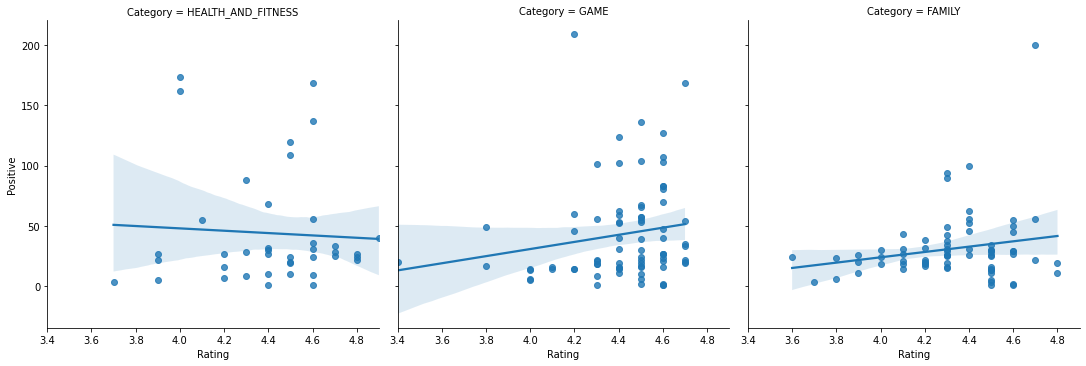

In [342]:
from src.minhas_funcs import plot_lm
plot_lm(data)

Os exemplos acima foram de situações onde temos informações diferentes, em dataframes diferentes, sobre o mesmo assunto. Nessas situações ficou claro que existe a necessidade de uso do ```.merge()```. Porém, também é muito comum temos exatamente as mesmas informações, sobre o mesmo assunto e em dataframes separados, por exemplo, um dataframe com as vendas de cada mês, ou cada ano. Todos os dataframes tem as mesmas colunas, porém cada um representa um mês, dia ou ano diferentes, nessa situação é comum usarmos o ```pd.concat()``` que ira concatenar todos os dataframes.

Na pasta "data/gasolina/" temos vários arquivos csv que descrevem a venda de gasolina para municipios do Brasil, a fonte desses dados é a ANP. Nessa situação temos 1 arquivo para cada ano entre 2000 e 2018.

In [347]:
pd.read_csv('data/gasolina/gasolina_2004.csv',sep=';',encoding='latin1').head()

,ANO,ESTADO,CÓDIGO IBGE,Município,Vendas
0,2004,Rondônia,1100015,ALTA FLORESTA D'OESTE,1380000
1,2004,Rondônia,1100023,ARIQUEMES,11807612
2,2004,Rondônia,1100031,CABIXI,460000
3,2004,Rondônia,1100049,CACOAL,8394037
4,2004,Rondônia,1100288,ROLIM DE MOURA,6232200


Podemos verificar se todos os arquivos csv possuem as mesmas colunas.

In [350]:
colunas = pd.read_csv('data/gasolina/gasolina_2000.csv',sep=';',encoding='latin1').columns

anos_dc = {}

for ano in range(2000,2019):
    temp = pd.read_csv(f'data/gasolina/gasolina_{ano}.csv',sep=';',encoding='latin1').columns
    anos_dc[ano] = temp == colunas

In [351]:
anos_dc

{2000: array([ True,  True,  True,  True,  True]),
 2001: array([ True,  True,  True, False,  True]),
 2002: array([ True,  True,  True, False,  True]),
 2003: array([ True,  True,  True, False,  True]),
 2004: array([ True,  True,  True, False,  True]),
 2005: array([ True,  True,  True, False,  True]),
 2006: array([ True,  True,  True, False,  True]),
 2007: array([ True,  True,  True,  True,  True]),
 2008: array([ True,  True,  True,  True,  True]),
 2009: array([ True,  True,  True,  True,  True]),
 2010: array([ True,  True,  True,  True,  True]),
 2011: array([ True,  True,  True,  True,  True]),
 2012: array([ True,  True,  True,  True,  True]),
 2013: array([ True,  True,  True,  True,  True]),
 2014: array([ True,  True,  True,  True,  True]),
 2015: array([ True,  True,  True,  True,  True]),
 2016: array([ True,  True,  True,  True,  True]),
 2017: array([ True,  True,  True,  True,  True]),
 2018: array([ True,  True, False, False,  True])}

In [352]:
pd.read_csv('data/gasolina/gasolina_2000.csv',sep=';',encoding='latin1').columns

Index(['ANO', 'ESTADO', 'CÓDIGO IBGE', 'Municípios', 'Vendas'], dtype='object')

In [353]:
pd.read_csv('data/gasolina/gasolina_2018.csv',sep=';',encoding='latin1').columns

Index(['ANO', 'ESTADO', 'CODIGO IBGE', 'Municipios', 'Vendas'], dtype='object')

In [354]:
dfs_gasolina = []

for ano in tqdm(range(2000,2019)):
    dfs_gasolina.append(pd.read_csv(f'data/gasolina/gasolina_{ano}.csv',sep=';',encoding='latin1'))

100%|██████████| 19/19 [00:00<00:00, 145.71it/s]


In [355]:
pd.concat(dfs_gasolina)

,ANO,ESTADO,CÓDIGO IBGE,Municípios,Vendas,Município,CODIGO IBGE,Municipios
0,2000.0,Acre,1200013.0,ACRELANDIA,32000,NaN,NaN,NaN
1,2000.0,Acre,1200104.0,BRASILEIA,660000,NaN,NaN,NaN
2,2000.0,Acre,1200138.0,BUJARI,10000,NaN,NaN,NaN
3,2000.0,Acre,1200179.0,CAPIXABA,66000,NaN,NaN,NaN
4,2000.0,Acre,1200203.0,CRUZEIRO DO SUL,4923000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
## corrigindo o nome das colunas ao ler o dataframe

dfs_gasolina = []

for ano in tqdm(range(2000,2019)):
    temp_df = pd.read_csv(f'data/gasolina/gasolina_{ano}.csv',sep=';',encoding='latin1',decimal=',')
    temp_df.columns = ['ano','estado','cod_ibge','mun','vendas']
    dfs_gasolina.append(temp_df)
# else:
    gasolina = pd.concat(dfs_gasolina,ignore_index=True).dropna(how='all')

100%|██████████| 19/19 [00:00<00:00, 36.83it/s]


In [366]:
gasolina

,ano,estado,cod_ibge,mun,vendas
0,2000.0,Acre,1200013.0,ACRELANDIA,32000.0
1,2000.0,Acre,1200104.0,BRASILEIA,660000.0
2,2000.0,Acre,1200138.0,BUJARI,10000.0
3,2000.0,Acre,1200179.0,CAPIXABA,66000.0
4,2000.0,Acre,1200203.0,CRUZEIRO DO SUL,4923000.0
...,...,...,...,...,...
99662,2018.0,Tocantins,1721109.0,TOCANTINIA,447000.0
99663,2018.0,Tocantins,1721208.0,TOCANTINOPOLIS,2783761.0
99664,2018.0,Tocantins,1721257.0,TUPIRAMA,114065.0
99665,2018.0,Tocantins,1722081.0,WANDERLANDIA,1997560.0


Agora temos todos os anos em um dataframe unico e podemos fazer a análise que quisermos.

In [367]:
gasolina.pivot_table(index='estado',columns='ano',values='vendas',aggfunc='sum')

ano,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
estado,,,,,,,,,,,,,,,,,,,
Acre,4.000185e+07,3.889274e+07,4.592857e+07,4.359770e+07,4.717556e+07,4.953164e+07,5.412547e+07,5.998673e+07,6.996194e+07,7.572404e+07,9.498380e+07,1.069488e+08,1.188918e+08,1.253300e+08,1.381518e+08,1.402588e+08,1.368177e+08,1.365926e+08,1.338723e+08
Alagoas,1.645483e+08,1.615238e+08,1.664998e+08,1.601721e+08,1.709946e+08,1.670446e+08,1.688994e+08,1.634904e+08,1.723746e+08,1.794001e+08,2.453278e+08,3.030961e+08,3.638326e+08,4.005180e+08,4.416120e+08,4.258727e+08,4.539623e+08,4.556607e+08,4.177187e+08
Amapa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.580102e+08
Amapá,4.625582e+07,4.520374e+07,5.056215e+07,5.183714e+07,5.710135e+07,5.791122e+07,6.464476e+07,7.234009e+07,8.250963e+07,8.600375e+07,9.939650e+07,1.095156e+08,1.279845e+08,1.378998e+08,1.544174e+08,1.537532e+08,1.515377e+08,1.547283e+08,NaN
Amazonas,2.427424e+08,2.461067e+08,2.657417e+08,2.713196e+08,3.013782e+08,3.028656e+08,3.320615e+08,3.543013e+08,3.885533e+08,4.033120e+08,4.686882e+08,5.213551e+08,5.693967e+08,5.907492e+08,6.273540e+08,6.172034e+08,6.341727e+08,6.444245e+08,6.141793e+08
Bahia,9.270140e+08,8.805268e+08,8.794112e+08,8.857193e+08,9.952923e+08,9.927217e+08,1.006425e+09,9.889118e+08,1.050094e+09,1.056463e+09,1.273406e+09,1.588826e+09,1.842730e+09,1.943731e+09,2.145017e+09,2.050794e+09,2.210593e+09,2.251136e+09,2.010770e+09
Ceara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.329769e+09
Ceará,4.716278e+08,4.586761e+08,4.846761e+08,4.762759e+08,5.032687e+08,5.091748e+08,5.305681e+08,5.525848e+08,6.155397e+08,6.659080e+08,8.201650e+08,9.433280e+08,1.120768e+09,1.216335e+09,1.348677e+09,1.331394e+09,1.372176e+09,1.381639e+09,NaN
Distrito Federal,5.933897e+08,6.087040e+08,6.445570e+08,6.393702e+08,NaN,7.105052e+08,7.360155e+08,7.316903e+08,7.730894e+08,7.616711e+08,8.995669e+08,1.002018e+09,1.079078e+09,1.123062e+09,1.172429e+09,1.122267e+09,1.199589e+09,1.266125e+09,1.090791e+09


Olhando o dataframe acima, percebemos que existem vários nomes de estados escritos de forma não consistente. Vamos normalizar esses nomes.

In [368]:
## biblioteca

import unidecode

In [370]:
unidecode.unidecode('NáSsÉr').lower()

'nasser'

In [371]:
def normalize_estado(value):
    return unidecode.unidecode(value).lower()

In [372]:
gasolina['estado'] = gasolina.estado.apply(normalize_estado)

In [374]:
plot_df = gasolina.pivot_table(index='estado',columns='ano',values='vendas',aggfunc='sum')
plot_df

ano,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
estado,,,,,,,,,,,,,,,,,,,
acre,4.000185e+07,3.889274e+07,4.592857e+07,4.359770e+07,4.717556e+07,4.953164e+07,5.412547e+07,5.998673e+07,6.996194e+07,7.572404e+07,9.498380e+07,1.069488e+08,1.188918e+08,1.253300e+08,1.381518e+08,1.402588e+08,1.368177e+08,1.365926e+08,1.338723e+08
alagoas,1.645483e+08,1.615238e+08,1.664998e+08,1.601721e+08,1.709946e+08,1.670446e+08,1.688994e+08,1.634904e+08,1.723746e+08,1.794001e+08,2.453278e+08,3.030961e+08,3.638326e+08,4.005180e+08,4.416120e+08,4.258727e+08,4.539623e+08,4.556607e+08,4.177187e+08
amapa,4.625582e+07,4.520374e+07,5.056215e+07,5.183714e+07,5.710135e+07,5.791122e+07,6.464476e+07,7.234009e+07,8.250963e+07,8.600375e+07,9.939650e+07,1.095156e+08,1.279845e+08,1.378998e+08,1.544174e+08,1.537532e+08,1.515377e+08,1.547283e+08,1.580102e+08
amazonas,2.427424e+08,2.461067e+08,2.657417e+08,2.713196e+08,3.013782e+08,3.028656e+08,3.320615e+08,3.543013e+08,3.885533e+08,4.033120e+08,4.686882e+08,5.213551e+08,5.693967e+08,5.907492e+08,6.273540e+08,6.172034e+08,6.341727e+08,6.444245e+08,6.141793e+08
bahia,9.270140e+08,8.805268e+08,8.794112e+08,8.857193e+08,9.952923e+08,9.927217e+08,1.006425e+09,9.889118e+08,1.050094e+09,1.056463e+09,1.273406e+09,1.588826e+09,1.842730e+09,1.943731e+09,2.145017e+09,2.050794e+09,2.210593e+09,2.251136e+09,2.010770e+09
ceara,4.716278e+08,4.586761e+08,4.846761e+08,4.762759e+08,5.032687e+08,5.091748e+08,5.305681e+08,5.525848e+08,6.155397e+08,6.659080e+08,8.201650e+08,9.433280e+08,1.120768e+09,1.216335e+09,1.348677e+09,1.331394e+09,1.372176e+09,1.381639e+09,1.329769e+09
distrito federal,5.933897e+08,6.087040e+08,6.445570e+08,6.393702e+08,NaN,7.105052e+08,7.360155e+08,7.316903e+08,7.730894e+08,7.616711e+08,8.995669e+08,1.002018e+09,1.079078e+09,1.123062e+09,1.172429e+09,1.122267e+09,1.199589e+09,1.266125e+09,1.090791e+09
espirito santo,4.973384e+08,4.387184e+08,4.572056e+08,4.477168e+08,4.224158e+08,4.311781e+08,4.616451e+08,4.749838e+08,4.852918e+08,5.111980e+08,6.382236e+08,7.157526e+08,8.217775e+08,8.617185e+08,9.349336e+08,9.170212e+08,9.471490e+08,9.375604e+08,9.096451e+08
goias,7.280019e+08,7.198322e+08,7.928515e+08,7.756506e+08,8.804384e+08,8.790543e+08,8.896108e+08,8.804350e+08,9.219287e+08,9.512480e+08,1.083507e+09,1.256557e+09,1.446209e+09,1.529630e+09,1.639889e+09,1.469880e+09,1.531089e+09,1.559199e+09,1.223071e+09


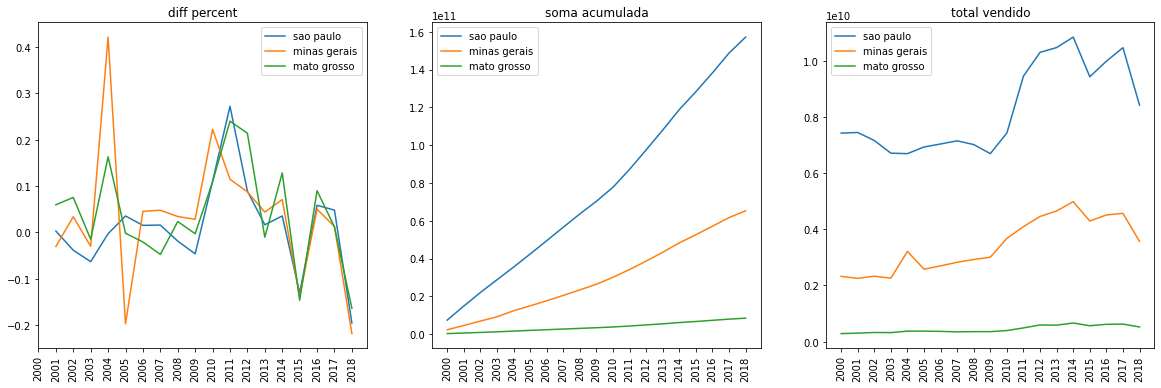

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
ls_estados = ['sao paulo','minas gerais','mato grosso']

f, ax = plt.subplots(1,3,figsize=(20,6))

for estado in ls_estados:
    sns.lineplot(x=range(2000,2019),y=plot_df.loc[estado].pct_change(),label=f'{estado}',ax=ax[0])

for estado in ls_estados:
    sns.lineplot(x=range(2000,2019),y=plot_df.loc[estado].cumsum(),label=f'{estado}',ax=ax[1])
    
for estado in ls_estados:
    sns.lineplot(x=range(2000,2019),y=plot_df.loc[estado],label=f'{estado}',ax=ax[2])
    
titles = ['diff percent','soma acumulada','total vendido']
    
for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].set_xticks(range(2000,2019))
    ax[i].set_xticklabels(labels=range(2000,2019),rotation=90)
    ax[i].set_ylabel('')
    ax[i].legend(loc='best')

# Valores Nulos
___

Ao se trabalhar com dados, estamos sujeitos a encontrar valores nulos. Valores nulos podem ocorrer por diversas razões, as mais comuns são a falta da coleta do dado ou algum erro no nosso código. Precisamos entender como encontrar, imputar ou dropar valores nulos. Para isso vamos aprender algumas funções ```.isna()```, ```.notna()```, ```.dropna()``` e ```.fillna()```

O primeiro trabalho é encontrar valores nulos.

In [ ]:
df = pd.read_csv('data/carros.csv')

for i in np.random.randint(0,df.shape[0],size=300):
    df.iloc[i,2] = np.nan

for i in np.random.randint(0,df.shape[0],size=300):
    df.iloc[i,3] = np.nan

for i in np.random.randint(0,df.shape[0],size=50):
    df.iloc[i,:] = np.nan
    
df.head()

In [ ]:
df.shape

A primeira forma de encontrar valores nulos é através do .info()

In [ ]:
df.info()

Podemos ver que a coluna 'Price' e a coluna 'transmission' possuem valores nulos. Mas também vemos que possuímos linhas que são completamente nulas. Outra forma, mais simples é utilizar o ```.isna()```

In [ ]:
## procurando valores nulos
df.isna()

In [ ]:
## somando valores nulos

df.isna().sum()

Agora podemos saber quantos valores nulos temos em cada coluna. Podemos também utilizar o ```.notna()``` para encontrar o contrário.

In [ ]:
df.notna().sum()

Ao encontrar valores nulos devemos tomar uma decisão. Iremos substituir os valores nulos por novos (imputação) ou vamos jogá-los fora (drop). Em ambos os casos devemos analisar os dados nulos.

In [ ]:
## descobrindo porcentagem

(df.isna().sum() / df.shape[0])*100

In [ ]:
df[df.price.isna()]

Vamos tratar primeiro as colunas que são inteiramente nulas, essas colunas não entregam nenhuma informação e são lixo no nosso dataset. Para isso vamos utilizar o ```.dropna()```

In [ ]:
df.dropna(how='all',inplace=True)

![](imgs/inplace.png)

In [ ]:
df.isna().sum()

Veja que dropamos somente as linhas que tinham todas as colunas nulas.

In [ ]:
df[df.price.isna()]

Como a coluna price é bem importante, podemos fazer um trabalho de imputação utilizando a média. Para isso vamos descobrir a média e depois utilizar o ```.fillna()```

In [ ]:
media = df.price.mean()

df.price.fillna(media,inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.loc[[34,100,253],:]

Temos agora a coluna transmission que também possui valores nulos, mas por ser uma variável categórico o mais correto seria utilizarmos uma imputação pela moda (visto que é impossível tirar a média de valores categóricos).

In [ ]:
moda = df.transmission.mode().values[0]

df.transmission.fillna(moda,inplace=True)

In [ ]:
df.isna().sum()

# Method Chaining
___

O encadeamento de métodos é um método de escrever código em pandas que todo cientista de dados DEVE saber. Ele consiste em escrever vários métodos seguidos um do outro e que retornem um objeto que o próximo objeto pode receber.

In [ ]:
ls_categorias = ['ART_AND_DESIGN','FAMILY','BOOKS_AND_REFERENCE']

df = pd.read_csv('data/googleplaystore.csv')
     
(
    df
    ## selecionando os dados que preciso
    .loc[df.Category.isin(ls_categorias),['Category','Reviews','Rating','App']]
    ## sobrescrevendo a coluna Reviews
    .assign(Reviews = lambda x: x.Reviews.astype(float))
    ## dropando os valores duplicados
    .drop_duplicates(subset=['App'],keep='last')
    ## dropando os valores nulos
    .dropna(subset=['Reviews','Rating'])
    ## agregando por categoria
    .groupby('Category')
    ## definindo funções de agregação
    .agg({'Reviews':sum,'Rating':np.mean})
    ## organizando os valores
    .sort_values('Rating',ascending=False)
    ## escolhendo só a coluna reviews
    .Reviews
    ## plotando
    .plot(kind='bar')
)

Basicamente toda função pode fazer parte de um encadeamento de métodos, porém aquelas que retornam uma série ou um dataframe são melhores. Veja que em nenhum dos métodos utilizamos o inplace=True, pois queremos que o método gere uma saída que será usada como entrada do próximo método.

# Bônus
___

Essas são funções que você deve conhecer e que vão te ajudar no dia a dia.

[.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) - Diferença entre valores dentro um a série ou dataframe (o valor de baixo menos o de cima)

[.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) - Criar janelas, associado a um função pode ser poderoso .rolling(7).mean() == média móvel de 7 dias.

[.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) - Renomear colunas, muito usado com method_chaining.

[.lt e família](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.lt.html) - Operadores lógicos que podem ser aplicado utilizando comparação dataframe com dataframe.